## Task 1- Prediction using Supervised ML
Task Objective: To predict the percentage of an student based on the no. of study hours using simple linear regression.

## Author- Shreya Grover

In [1]:
#Importing the essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the dataset
url= "http://bit.ly/w-data"
data= pd.read_csv(url)

#Printing the first 5 rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualisation of the Dataset

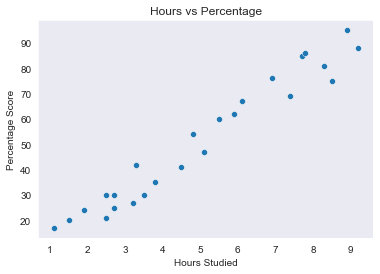

In [3]:
#Plotting a scatter graph to visualise the data
sns.set_style('dark')
sns.scatterplot(x='Hours', y= 'Scores', data=data)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the above graph we can see that there is a positive linear relation between the hours studied and percentage scored.

### Preparing the Data

In [4]:
#In this step, the data has been divided into attributes(inputs) and labels(outputs)
X= data.iloc[:,:-1].values
y= data.iloc[:, 1].values

##### Splitting the data

In [5]:
#Splitting the data using the Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) #Training data will be 70%

### Training the Algorithm

In [6]:
#After splitting the data into training(70%) and testing(30%), now the data is set to get trained.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training is complete.")

Training is complete.


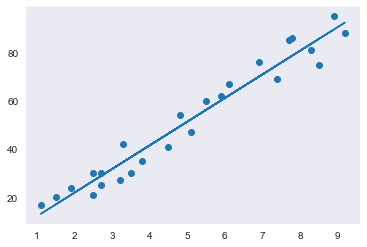

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions 
We have trained our algorithm, now it's the time for predictions.

In [8]:
#Predicting the Scores
y_pred = regressor.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [10]:
#As asked in the question to predict score, if a student studies for 9.25 hrs/ day
hours=[[9.25]]
s_pred=regressor.predict(hours)
s_pred

array([92.91505723])

#### The predicted score, if a student studies for 9.25 hrs/day is 92.91

### Evaluating the model
After making predictions, the last step is to evaluate the performance of algorithm by calculating the mean squared error or mean absolute error.

In [11]:
from sklearn import metrics
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 22.96509721270043


In [12]:
print("Mean Absoloute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absoloute Error: 4.419727808027652
